-----------------------------
## Context:
-----------------------------
In this case study, we will use the Education dataset which contains information on educational institutes in USA. The data has various attributes about number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and extract insights. 

-----------------------------
## Dataset: 
-----------------------------

The Education dataset contains information on various colleges in USA. It contains the following information:

- Names: Names of various universities and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with a Ph.D.
- Terminal: Percentage of faculties with terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset

In [3]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Fit notebook cell width to window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
sns.set(font_scale=1.025, rc={'figure.figsize': (10, 6),
                              'axes.facecolor': '#f2f2f0',
                              'axes.edgecolor': '#f2f2f0',
                              'figure.facecolor': '#f2f2f0', 
                              'axes.prop_cycle':mpl.cycler(color=['b', 'r', 'g', 'gold', 'purple']),
                              'grid.color': '#c4c4c4', 
                              'grid.linewidth': 0.5,
                              'lines.linewidth': 1.5,
                              'text.color': '#000000',
                              'xtick.color': '#000000',
                              'ytick.color': '#000000'})

#### Loading data

In [6]:
data=pd.read_csv("Education.csv")

In [7]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Check the info of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

**Observations:**

- There are 777 observations and 18 columns in the dataset.
- All columns have 777 non-null values i.e. there are no missing values.
- All columns are numeric except the Names column which is of object data type.

## Data Preprocessing and Exploratory Data Analysis

#### Check if all the college names are unique

In [9]:
data.Names.nunique()

777

**Observations:**

- All college names are unique
- As all entries are unique, it would not add value to our analysis. We can drop the Names column. 

In [10]:
#Dropping Names column 
data.drop(columns="Names", inplace=True)

#### Summary Statistics

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observations:**

- On an average, approx 3,000 applications are received in US universities, out of which around 2,000 applications are accepted by the universities and around 780 new students get enrolled.
- The standard deviation is very high for these variables - Apps, Accepted, Enroll which shows the variety of universities and colleges.
- The average cost for room and board, books, and personal expense is approx 4,357, 550, and 1,350 dollars respectively.
- The average number of full time undergrad students are around 3700 whereas the average number of part-time undergrad students stand low at around 850.
- PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's see how many such observations are there in the data.

In [12]:
data[(data.PhD>100) | (data.Grad_Rate>100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


**There is just one such observation for each variable. We can cap the values to 100%.**

In [13]:
data.loc[582,"PhD"]=100
data.loc[95,"Grad_Rate"]=100

#### Let's check the distribution and outliers for each column in the data

      count         mean          std   min    25%     50%     75%      max  \
Apps  777.0  3001.638353  3870.201484  81.0  776.0  1558.0  3624.0  48094.0   

         skew  
Apps  3.72375  


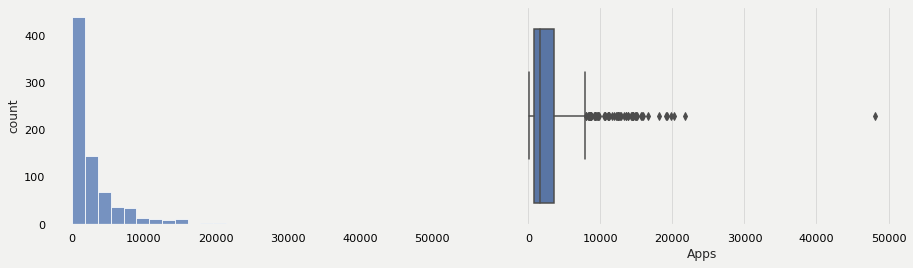

        count         mean          std   min    25%     50%     75%      max  \
Accept  777.0  2018.804376  2451.113971  72.0  604.0  1110.0  2424.0  26330.0   

            skew  
Accept  3.417727  


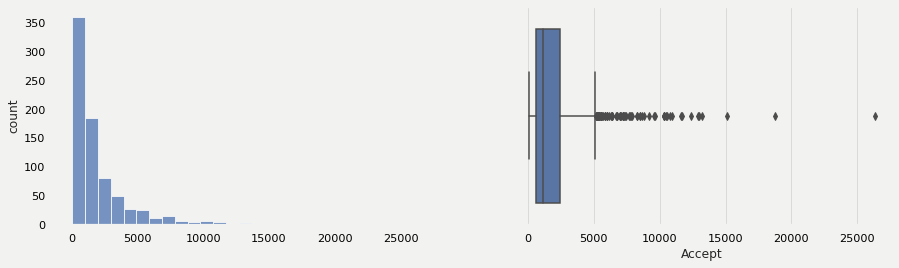

        count        mean        std   min    25%    50%    75%     max  \
Enroll  777.0  779.972973  929.17619  35.0  242.0  434.0  902.0  6392.0   

            skew  
Enroll  2.690465  


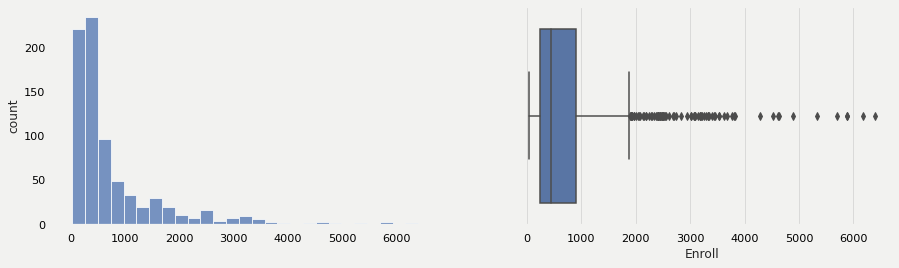

           count       mean        std  min   25%   50%   75%   max      skew
Top10perc  777.0  27.558559  17.640364  1.0  15.0  23.0  35.0  96.0  1.413217


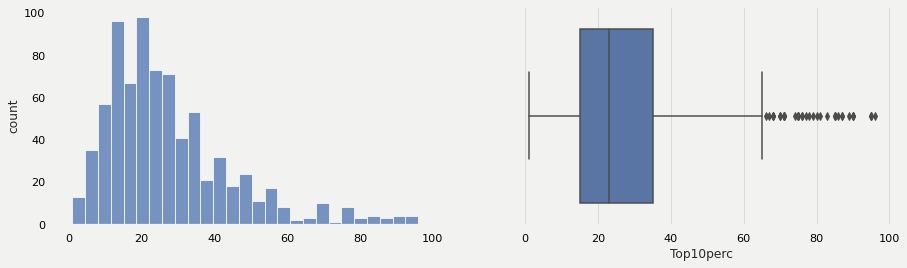

           count       mean        std  min   25%   50%   75%    max     skew
Top25perc  777.0  55.796654  19.804778  9.0  41.0  54.0  69.0  100.0  0.25934


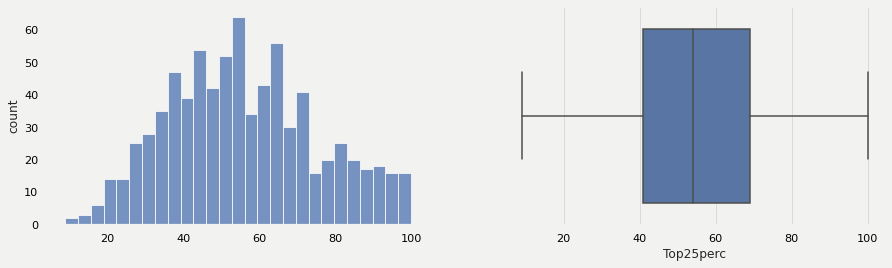

             count         mean          std    min    25%     50%     75%  \
F_Undergrad  777.0  3699.907336  4850.420531  139.0  992.0  1707.0  4005.0   

                 max      skew  
F_Undergrad  31643.0  2.610458  


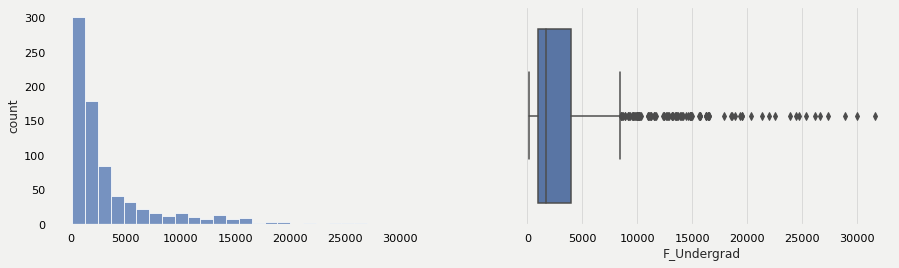

             count        mean          std  min   25%    50%    75%      max  \
P_Undergrad  777.0  855.298584  1522.431887  1.0  95.0  353.0  967.0  21836.0   

                 skew  
P_Undergrad  5.692353  


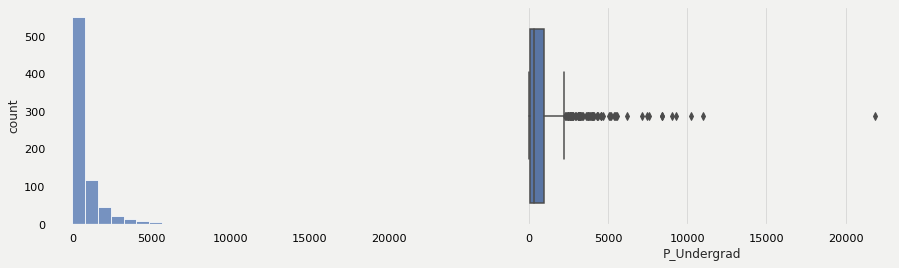

          count          mean          std     min     25%     50%      75%  \
Outstate  777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0  12925.0   

              max      skew  
Outstate  21700.0  0.509278  


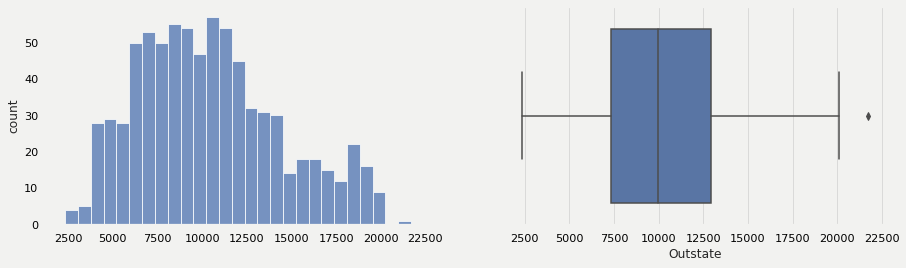

            count         mean          std     min     25%     50%     75%  \
Room_Board  777.0  4357.526384  1096.696416  1780.0  3597.0  4200.0  5050.0   

               max      skew  
Room_Board  8124.0  0.477356  


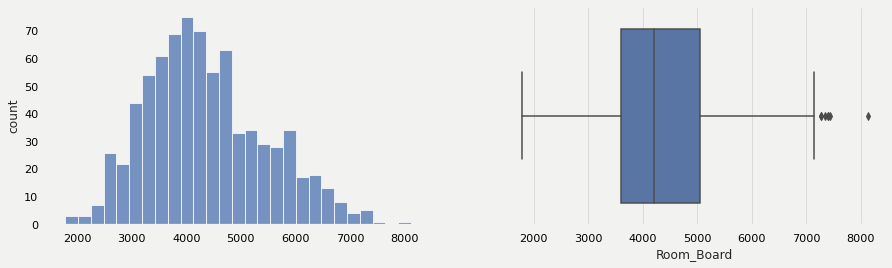

       count        mean        std   min    25%    50%    75%     max  \
Books  777.0  549.380952  165.10536  96.0  470.0  500.0  600.0  2340.0   

           skew  
Books  3.485025  


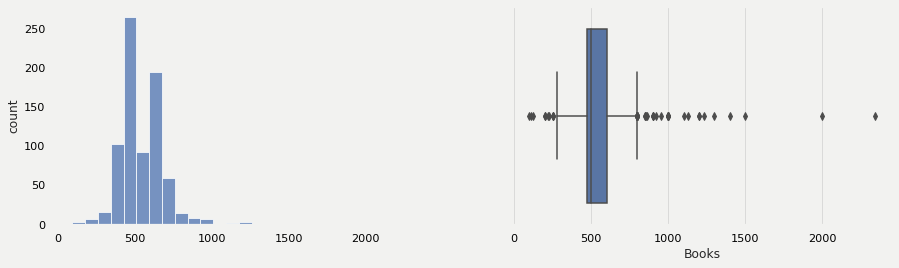

          count         mean         std    min    25%     50%     75%  \
Personal  777.0  1340.642214  677.071454  250.0  850.0  1200.0  1700.0   

             max      skew  
Personal  6800.0  1.742497  


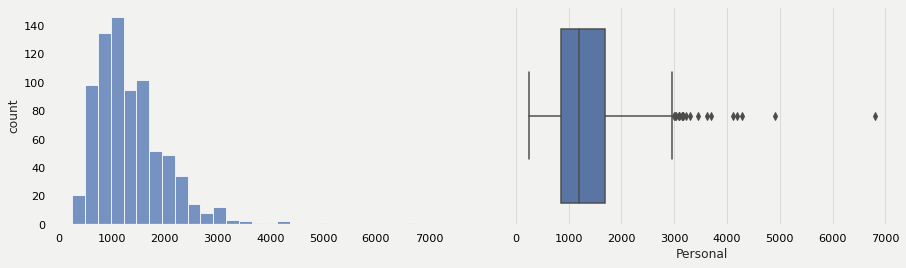

     count       mean        std  min   25%   50%   75%    max     skew
PhD  777.0  72.656371  16.321324  8.0  62.0  75.0  85.0  100.0 -0.77065


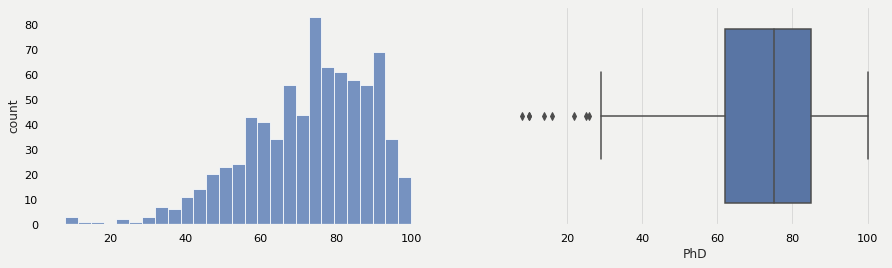

          count       mean        std   min   25%   50%   75%    max      skew
Terminal  777.0  79.702703  14.722359  24.0  71.0  82.0  92.0  100.0 -0.816542


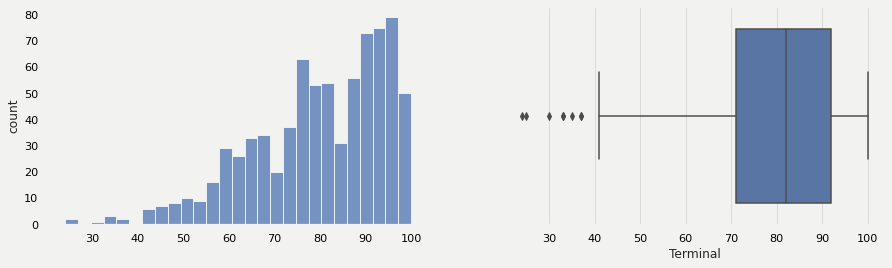

           count       mean       std  min   25%   50%   75%   max      skew
S_F_Ratio  777.0  14.089704  3.958349  2.5  11.5  13.6  16.5  39.8  0.667435


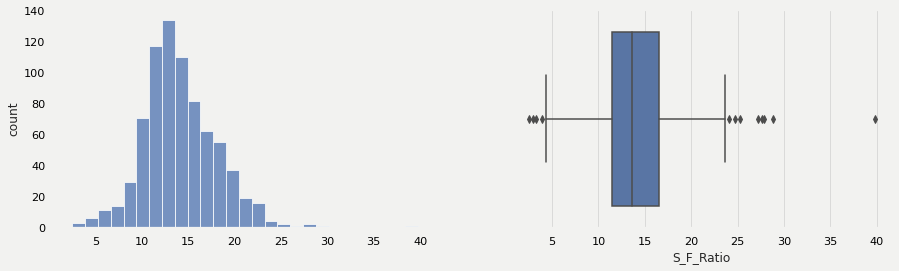

             count       mean        std  min   25%   50%   75%   max  \
perc_alumni  777.0  22.743887  12.391801  0.0  13.0  21.0  31.0  64.0   

                 skew  
perc_alumni  0.606891  


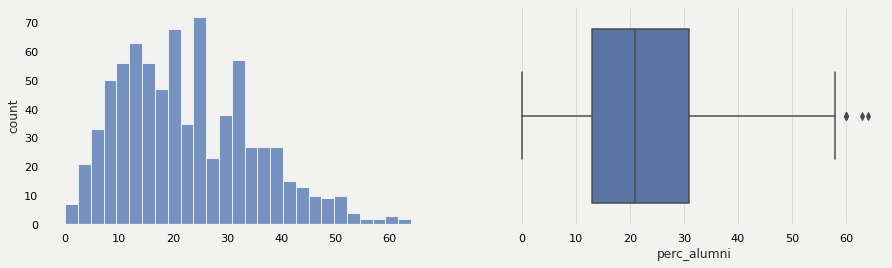

        count         mean         std     min     25%     50%      75%  \
Expend  777.0  9660.171171  5221.76844  3186.0  6751.0  8377.0  10830.0   

            max      skew  
Expend  56233.0  3.459322  


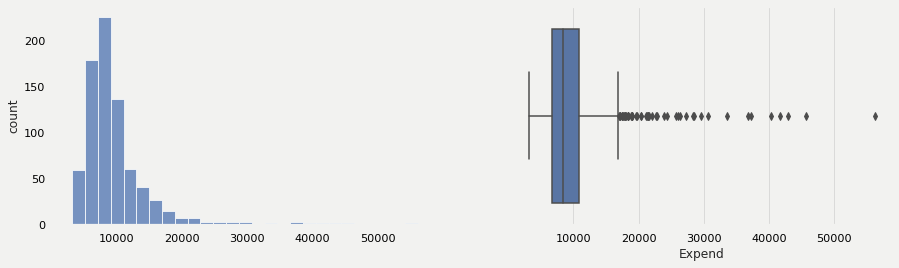

           count       mean        std   min   25%   50%   75%    max  \
Grad_Rate  777.0  65.440154  17.118804  10.0  53.0  65.0  78.0  100.0   

               skew  
Grad_Rate -0.137621  


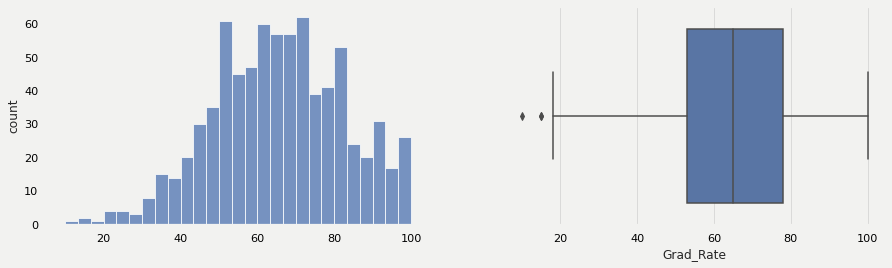

In [14]:
cont_cols = list(data.columns)
n_bins = int(np.sqrt(len(data)))
for col in cont_cols:
    tmp_desc = data[[col]].describe().T
    tmp_desc['skew'] = data[col].skew()
    print(tmp_desc)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=n_bins, grid=False, alpha=0.75)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal and Expend variables are highly right skewed. It is evident from boxplots that all these variables have outliers.
- Top25percent is the only variable which does not possess outliers.
- Outstate, Room_Board, S_F_Ratio and perc_alumni seems to have a moderate right skew.
- PhD and Terminal are moderately left skewed. 

### Lets look at various distribution transformations and how they impact normality.

#### Testing for normality

**Shapiro-Wilk test:**

The Shapiro-Wilk test is a way to tell if a set of observations comes from a *normal* distribution. The test gives you a $W$ value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold).

- If the `p value is less than the chosen alpha level`, then the null hypothesis is rejected and there is evidence that the data tested are `not normally distributed`.

- If the `p value is greater than the chosen alpha level`, then the null hypothesis that the `data came from a normally distributed population` cannot be rejected .

$$ \alpha = 0.05 $$

In [15]:
from scipy import stats

def which_dist(df: pd.DataFrame, n_bins: int) -> dict:
    SCALED = None; best_trans = {}
    colors = cm.rainbow(np.linspace(0, 1, len(df.columns)))
    for col, c in zip(list(df.columns), colors):
        minmax = MinMaxScaler(feature_range=(0.01, df[col].max()))
        if df[col].min() <= 0.0:
            z = minmax.fit_transform(df[col].values.reshape(-1, 1)).squeeze()
            SCALED = True
        else: 
            z = df[col]
            SCALED = False
        z0, _ = stats.boxcox(z, lmbda=None)
        z1 = stats.boxcox(z, lmbda=-1)
        z2 = stats.boxcox(z, lmbda=-0.5)
        z3 = stats.boxcox(z, lmbda=0.0)
        z4 = stats.boxcox(z, lmbda=0.5)
        z5 = stats.boxcox(z, lmbda=2)
        z6 = stats.boxcox(z, lmbda=-2)
        z7 = np.cbrt(df[col].values)
        dist_dict = {
            'Original':df[col],
            'Boxcox':z0,
            'Recip':z1,
            'Recip_Sqrt':z2,
            'Log':z3,
            'Sqrt':z4,
            'Square':z5,
            'Recip_Square':z6,
            'Cube_rt':z7,
        }
        fig = plt.figure(figsize=(12,6))
        shapiro_p_vals = np.empty(len(dist_dict))
        for i, trans in enumerate(list(dist_dict.keys())):
            w, p_val = stats.shapiro(dist_dict[trans])
            shapiro_p_vals[i] = p_val
            ax = fig.add_subplot(3, 3, i+1)
            plt.hist(dist_dict[trans], bins=n_bins, color=c, alpha=0.75)
            plt.title(trans+f'\nShapiro P-Value: {round(p_val, 4)}')
        fig.suptitle('MinMax Scaled '+col, fontsize=20) if SCALED else fig.suptitle(col, fontsize=20)
        fig.tight_layout()
        fig.subplots_adjust(top=.855);
        plt.show();
        best_trans[col] = [list(dist_dict.keys())[shapiro_p_vals.argmax()], shapiro_p_vals[shapiro_p_vals.argmax()]]
    return pd.DataFrame.from_dict(best_trans, orient='index', columns=['Transformation', 'Shapiro_P_Value'])\
                       .rename_axis('Variable').sort_values('Shapiro_P_Value', ascending=False)

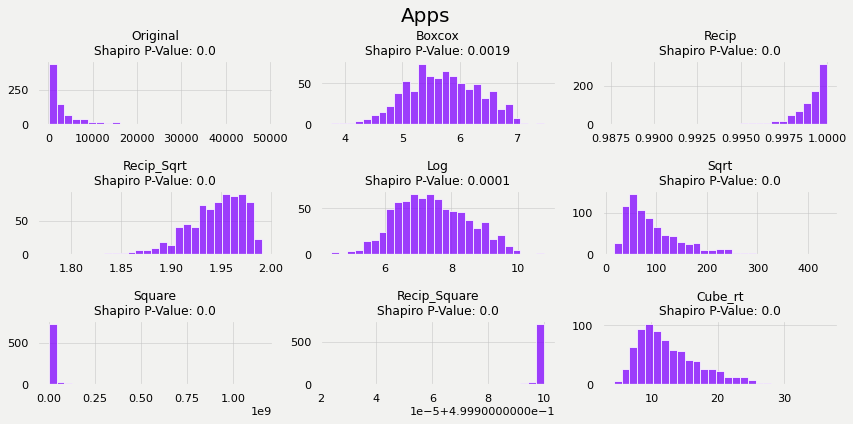

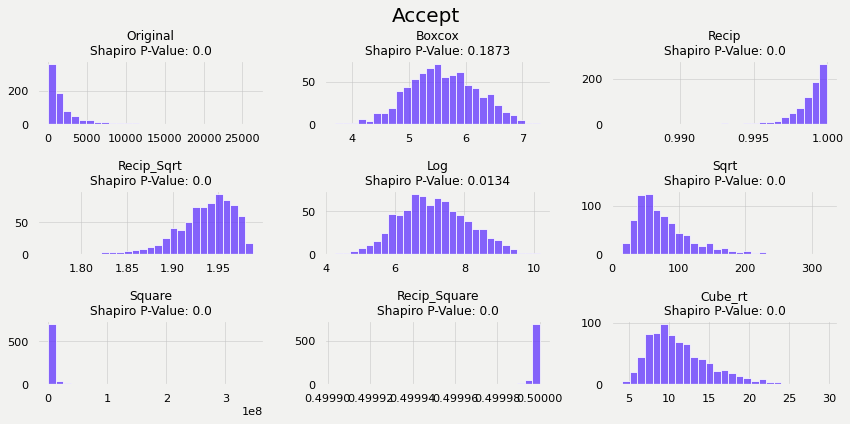

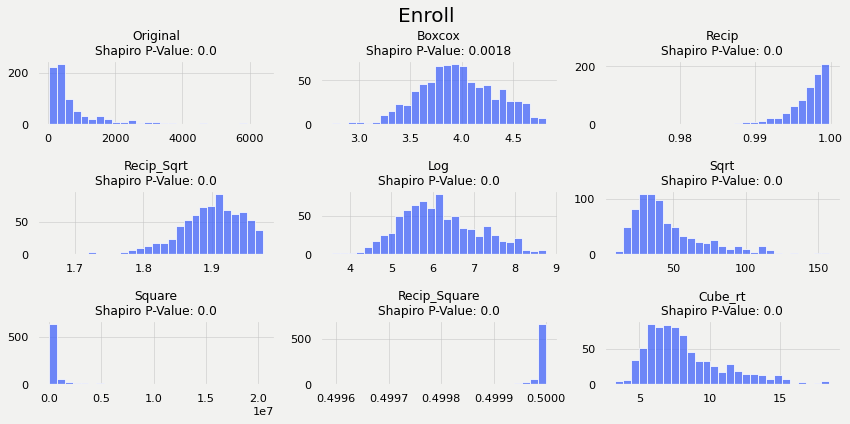

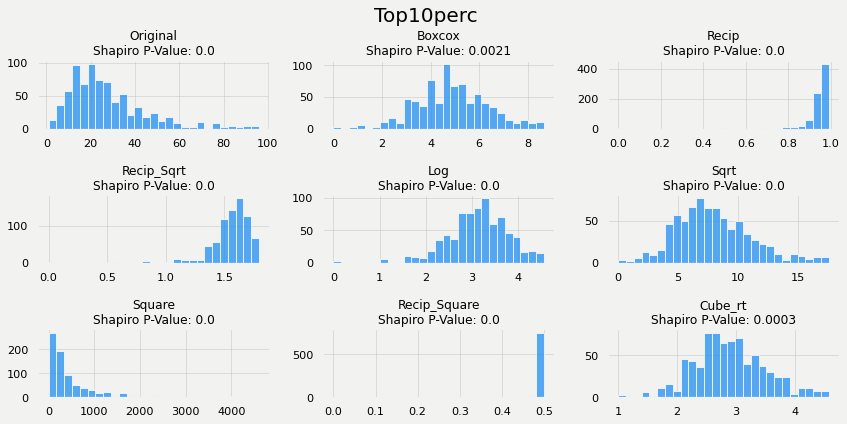

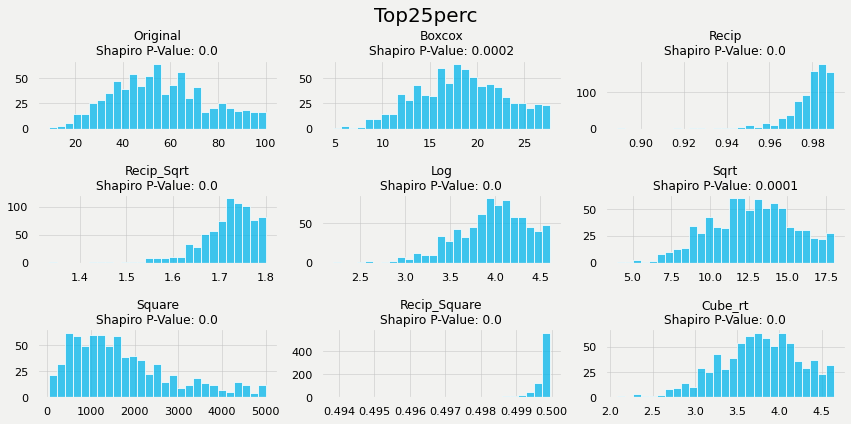

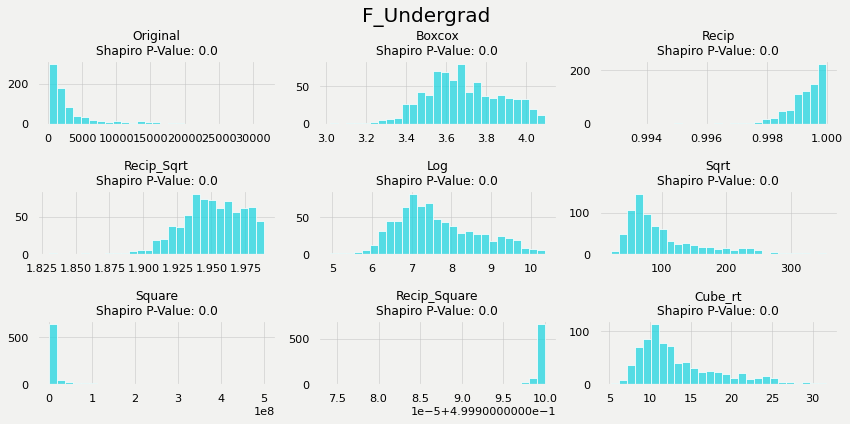

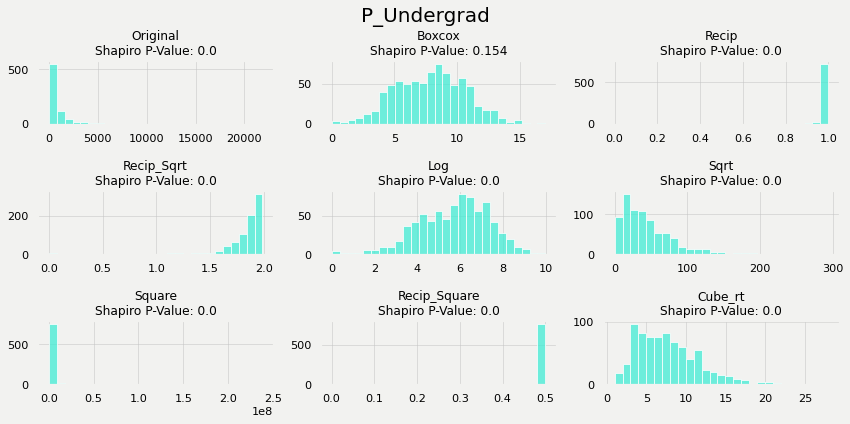

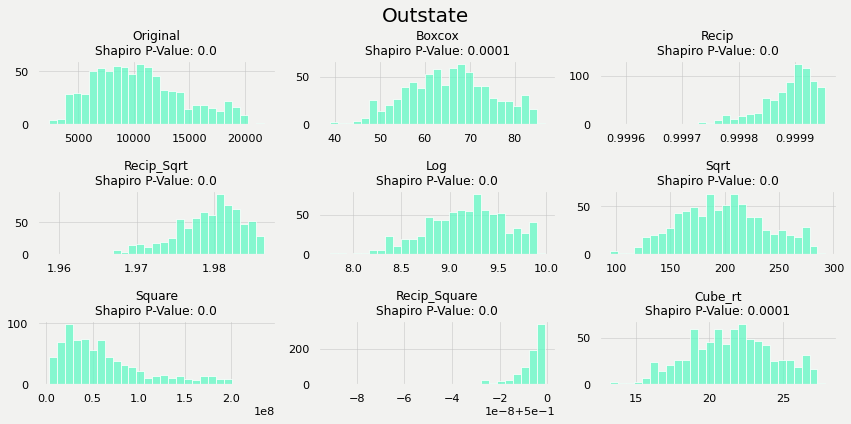

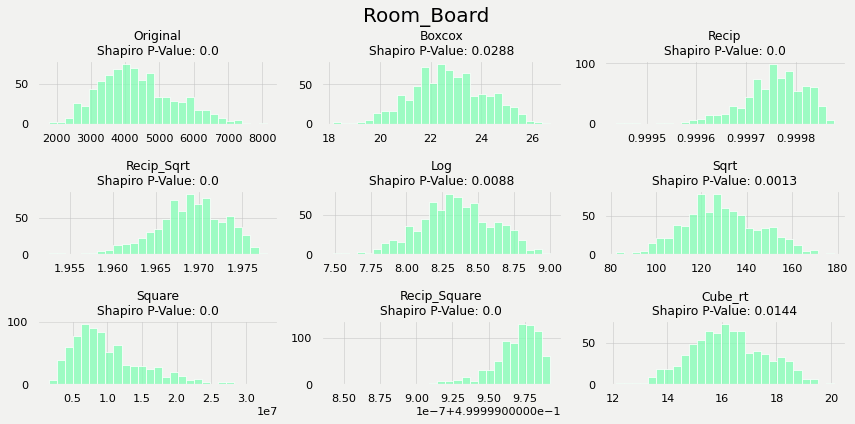

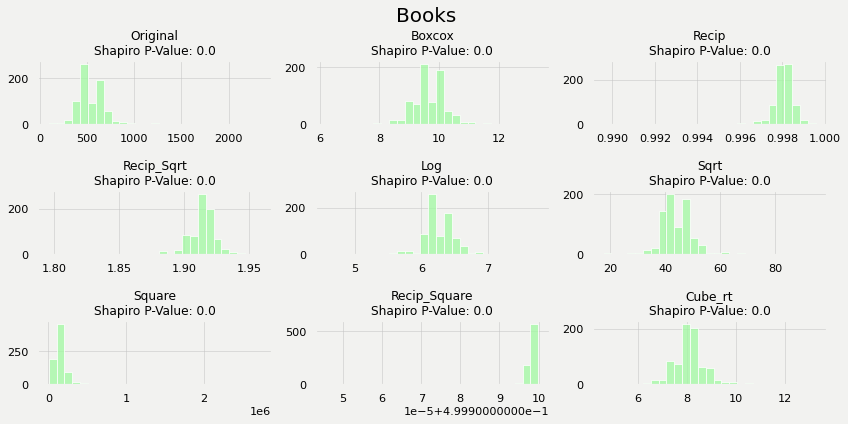

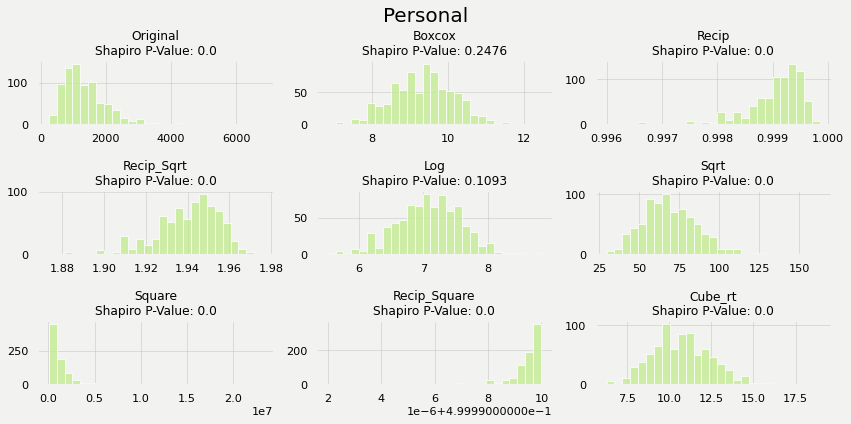

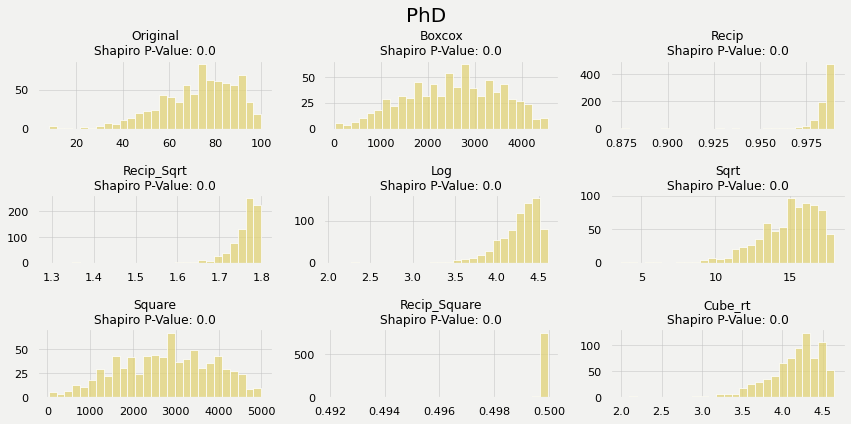

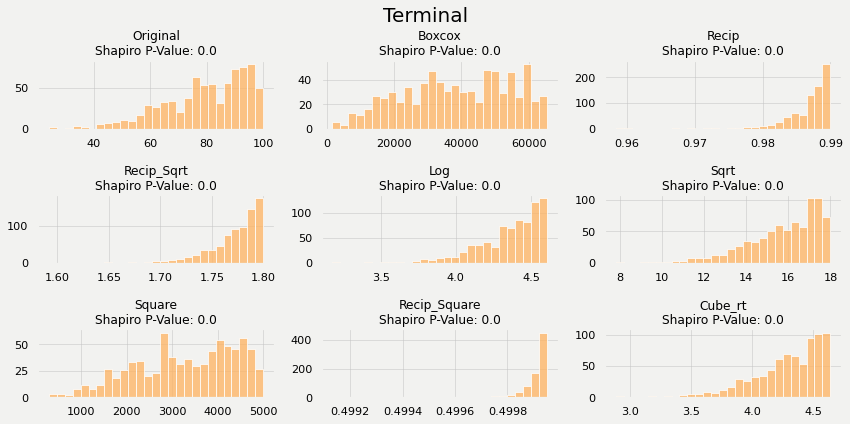

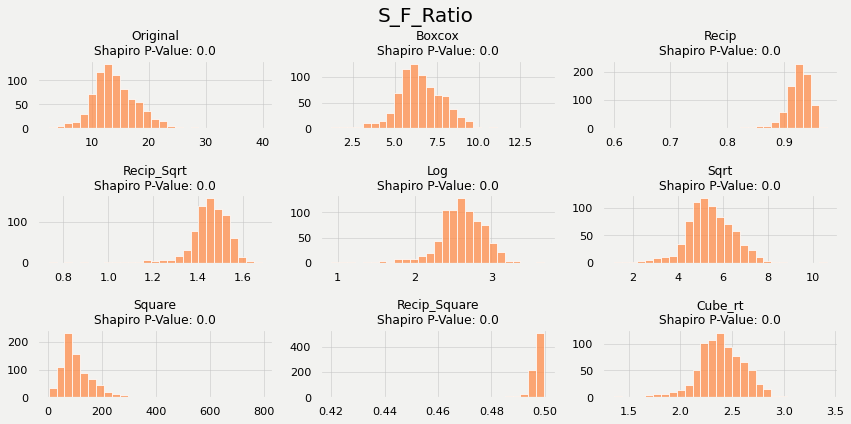

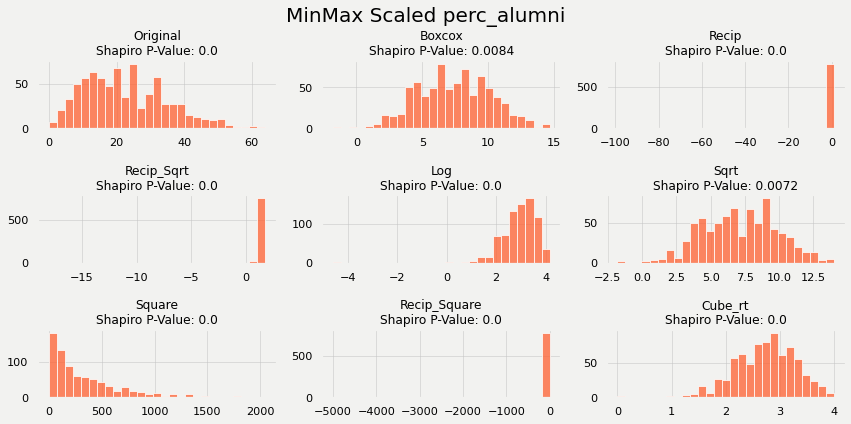

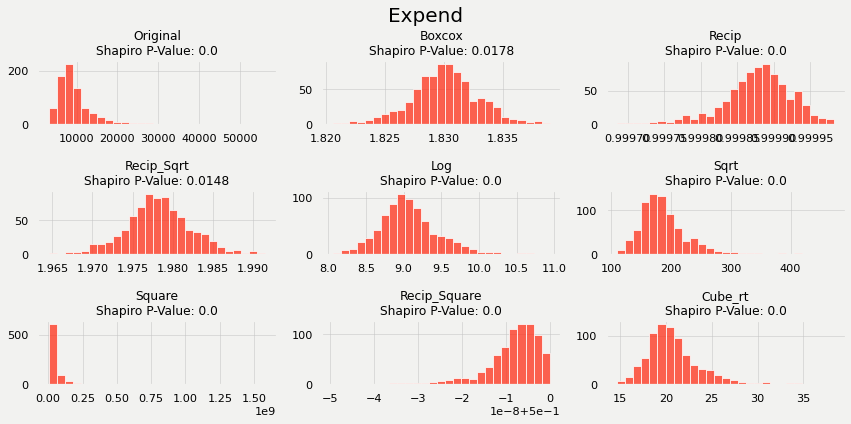

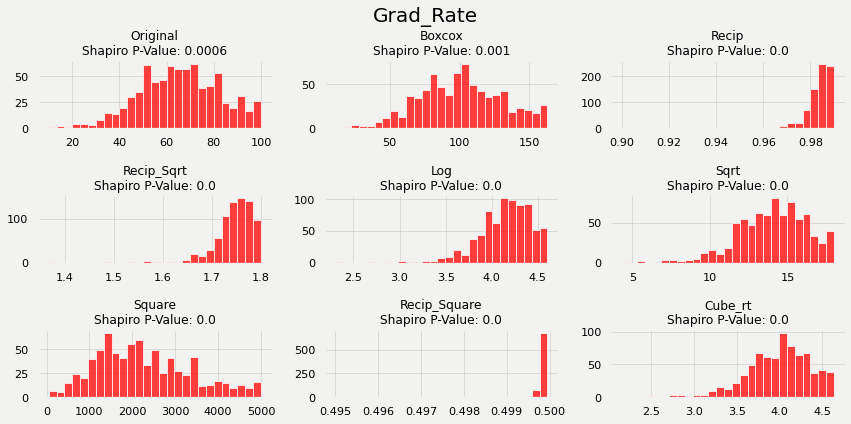

In [16]:
best_trans = which_dist(df=data, n_bins=n_bins)

In [17]:
best_trans.round(5)

,Transformation,Shapiro_P_Value
Variable,,
Personal,Boxcox,0.24757
Accept,Boxcox,0.18730
P_Undergrad,Boxcox,0.15402
Room_Board,Boxcox,0.02885
Expend,Boxcox,0.01781
perc_alumni,Boxcox,0.00841
Top10perc,Boxcox,0.00212
Apps,Boxcox,0.00188
Enroll,Boxcox,0.00177


In [18]:
best_trans[best_trans['Shapiro_P_Value'] >= 0.05]

,Transformation,Shapiro_P_Value
Variable,,
Personal,Boxcox,0.247574
Accept,Boxcox,0.187305
P_Undergrad,Boxcox,0.154021


**Now, let's check the correlation among different variables.**

In [19]:
def triag_corr(df: pd.DataFrame, fig_xy: list = [13,10], cmap: str = 'rocket', annot: bool = True, annot_s: int = 8, 
               fmt: str = ".3%", abs_: bool = False, method: str = 'pearson') -> plt.figure:
    plt.figure(figsize=(fig_xy[0], fig_xy[1]))
    corr = df.corr(method=method).abs() if abs_ else df.corr(method=method)
    mask = np.tri(*corr.shape).T 
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=annot, annot_kws={"size":annot_s}, fmt=fmt)
    plt.show()

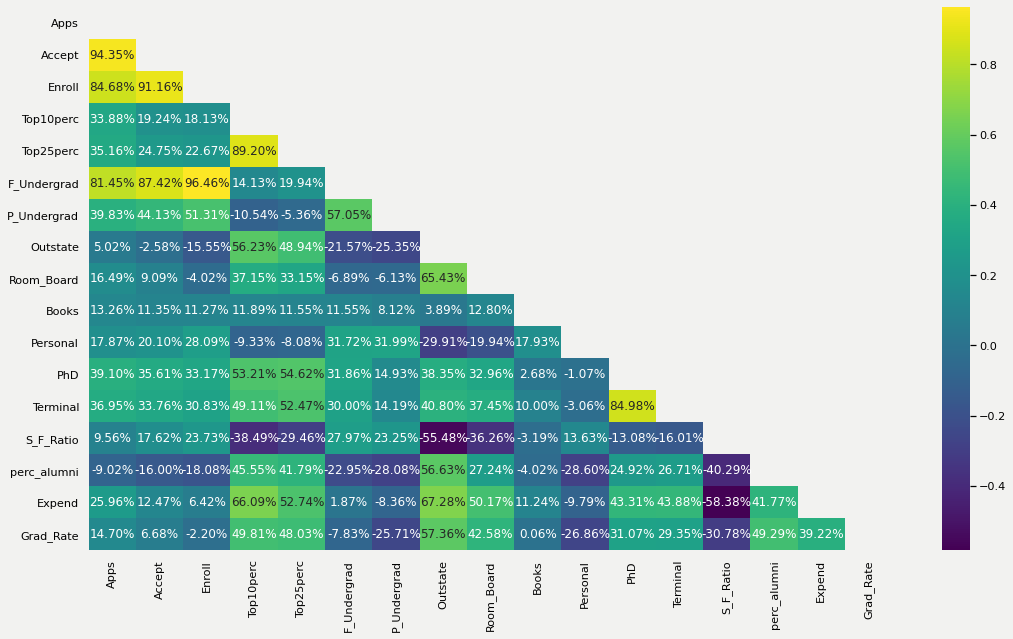

In [20]:
triag_corr(
    df=data, 
    fig_xy=[18,10],
    abs_=False,
    cmap='viridis',
    method='pearson',
    fmt='.2%',
    annot_s=12
)

**Observations:**

- We can see high positive correlation among following variables: 
    1. Apps and Accept
    2. Apps and Enroll
    3. Apps and F_Undergrad
    4. Accept and Enroll
    5. Accept and F_Undergrad
    6. Enroll and F_Undergrad
    7. Top10perc and Top25percent
    8. PhD and Terminal
- We can see high negative correlation among following variables:
    1. S_F_Ratio and Top10perc
    2. S_F_Ratio and Expend

In [21]:
def get_redundant_pairs(df: pd.DataFrame) -> set:
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def mu_std_corr_matrix(corr: pd.DataFrame or np.array, rnd: int = 3):
    corr = corr.abs().copy()
    corr.values[np.tril_indices_from(corr)] = np.nan     
    return (round(corr.unstack().mean(),rnd), round(corr.unstack().std(),rnd))

def get_top_abs_correlations(df: pd.DataFrame, n: int = 5) -> pd.Series:
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)\
                     .to_frame().rename(columns={0:'Correlation'}).rename_axis(['X', 'y'])
    return au_corr[0:n]

In [22]:
mu_abs_corr, std_abs_corr = mu_std_corr_matrix(corr=data.corr(), rnd=3)
top_abs_corrs = get_top_abs_correlations(df=data, n=20)
top_abs_corrs.head()

,,Correlation
X,y,
Enroll,F_Undergrad,0.964640
Apps,Accept,0.943451
Accept,Enroll,0.911637
Top10perc,Top25perc,0.891995
Accept,F_Undergrad,0.874223


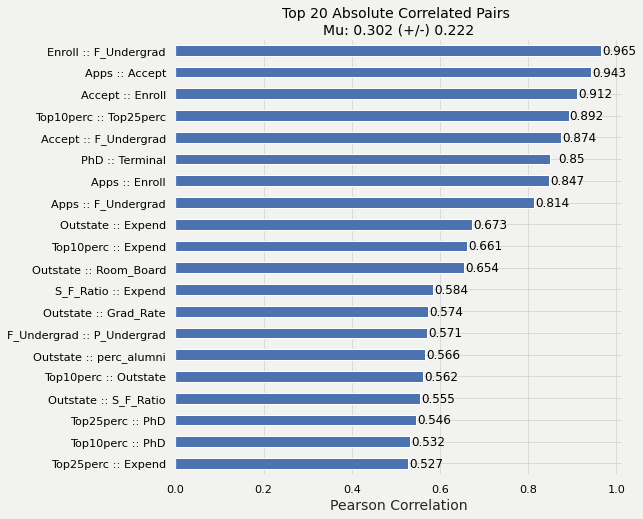

In [24]:
abs_corrs_idx = [str(i)+' :: '+str(x) for i, x in zip(top_abs_corrs.index.droplevel(1), top_abs_corrs.index.droplevel(0))]
top_abs_corrs = pd.DataFrame(top_abs_corrs.values, index=abs_corrs_idx, columns=['Correlation'])

fig, ax = plt.subplots(figsize=(8,8))
top_abs_corrs.sort_values('Correlation').plot(kind='barh', ax=ax, legend=False)
for i, v in enumerate(top_abs_corrs.sort_values('Correlation').values):
    ax.text(x=v + 0.08, y=i, s=str(round(v[0],3)), fontweight='medium', fontsize=12, 
        va='center', ha='right')
plt.title(f'Top 20 Absolute Correlated Pairs \nMu: {mu_abs_corr} (+/-) {std_abs_corr}', fontsize=14)
plt.xlabel('Pearson Correlation', fontsize=14);

In [25]:
# Make a copy of og data
trans_df = data.copy()

# Loop over each column
for col in trans_df.columns:
    
    # Grab the best transfomation method
    trans = best_trans.loc[col]['Transformation']
    
    # Minmax scale varibles when they contain values <= 0
    if trans_df[col].min() <= 0.0:
        minmax = MinMaxScaler(feature_range=(0.01, trans_df[col].max()))
        z = minmax.fit_transform(trans_df[col].values.reshape(-1, 1)).squeeze()
    else:
        z = trans_df[col]
    
    # Update column with best transformation 
    if trans == 'Boxcox':
        tmp, _ = stats.boxcox(z, lmbda=None)
        trans_df[col] = tmp
    elif trans == 'Cube_rt':
        tmp = np.cbrt(z.values)
        trans_df[col] = tmp
    else:
        tmp = stats.boxcox(z, lmbda=2)
        trans_df[col] = tmp

#### Scaling the data

In [26]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
trans_data_scaled=pd.DataFrame(scaler.fit_transform(trans_df), columns=trans_df.columns)

In [27]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


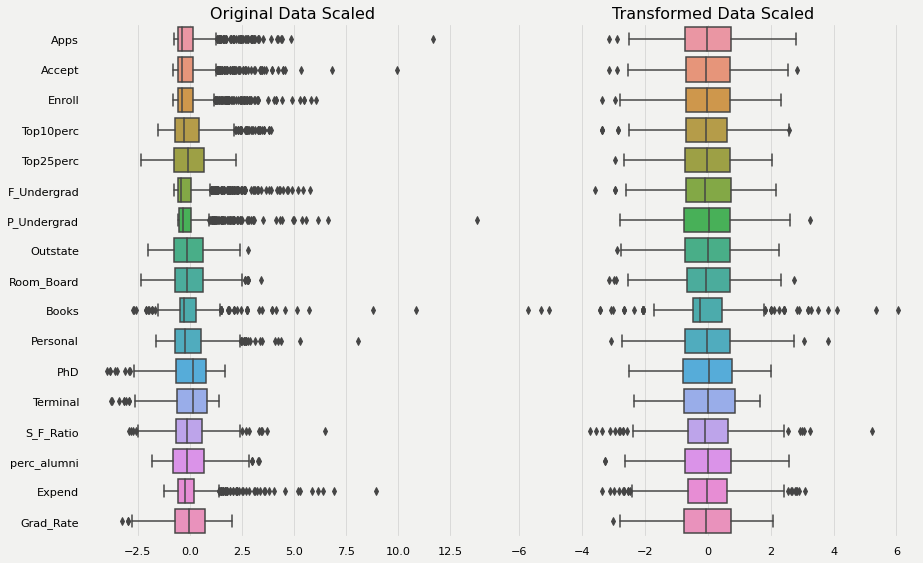

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(13,8), sharey=True)
sns.boxplot(data=data_scaled, orient='h', ax=ax[0])
ax[0].set_title('Original Data Scaled', fontsize=16)
sns.boxplot(data=trans_data_scaled, orient='h', ax=ax[1])
ax[1].set_title('Transformed Data Scaled', fontsize=16)
plt.tight_layout()
plt.show()

## Principal Component Analysis

In [29]:
data_scaled.shape

(777, 17)

In [33]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
trans_pca = PCA(n_components=n, random_state=2)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))
trans_data_pca1 = pd.DataFrame(trans_pca.fit_transform(trans_data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
trans_exp_var = trans_pca.explained_variance_ratio_

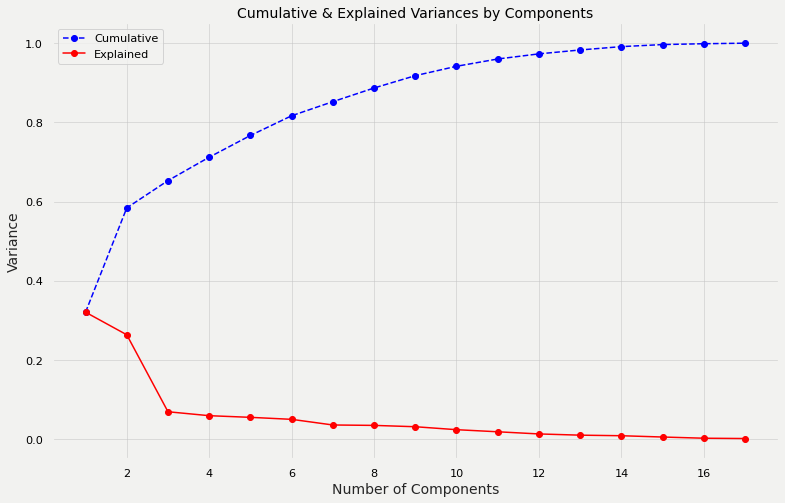

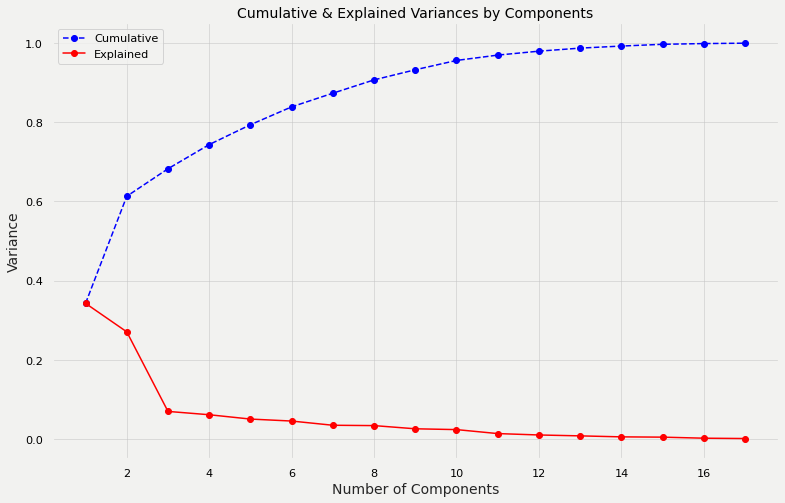

In [34]:
# visualize the Explained Individual Components
plt.figure(figsize = (13,8))
plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color='blue')
plt.plot(range(1,n+1), pca.explained_variance_ratio_, marker = 'o', color='red')
plt.title("Cumulative & Explained Variances by Components", fontsize=14)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.legend(['Cumulative', 'Explained'])
plt.show()

# visualize the Explained Individual Components
plt.figure(figsize = (13,8))
plt.plot(range(1,n+1), trans_pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color='blue')
plt.plot(range(1,n+1), trans_pca.explained_variance_ratio_, marker = 'o', color='red')
plt.title("Cumulative & Explained Variances by Components", fontsize=14)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.legend(['Cumulative', 'Explained'])
plt.show()

In [35]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var):
    sum += i
    if(sum > 0.70):
        print(f"Number of PCs that explain at least 70% variance: {ix+1}")
        break

Number of PCs that explain at least 70% variance: 4


**Observations**:

-  We can see that out of the 17 original features, we reduced the number of features through principal components to 4, these components explain approximately 70% of the original variance.

- So that is about 76% reduction in the dimensionality with a loss of 30% in variance.

- Let us now look at these principal components as a linear combination of original features.

In [36]:
pc_comps = ['PC1','PC2','PC3','PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.28
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.13
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.08


**Observations:**

- Each principal component is a linear combination of original features. For example, we can write the equation for PC1 in the following manner:

`PC1 =  0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F_Undergrad + 0.03 * P_Undergrad + 0.29 * Outstate + 0.25 * Room_Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S_F_Ratio + 0.21 * perc_alumni + 0.32 * Expend + 0.25 * Grad_Rate`

- For the business implications, the first two principal components picks up around 58% of the variability in the data. That is to say, picking up a considerable amount of variation in the data.

- The explanation of each component along with their weights is also one of the ways to look at it. For example, we can consider weights with absolute value greater than 0.25 significant and analyze the each component.

**NOTE: Decision regarding what value of weights is high or significant may vary from case to case. It depends on the problem at hand.**

In [37]:
def color_high(val):
    if val < -0.25: # you can decide any value as per your understanding
        return 'background: hotpink'
    elif val > 0.25:
        return 'background: lime'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.280000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.050000
Top25perc,0.340000,-0.040000,-0.020000,-0.110000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.130000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.080000


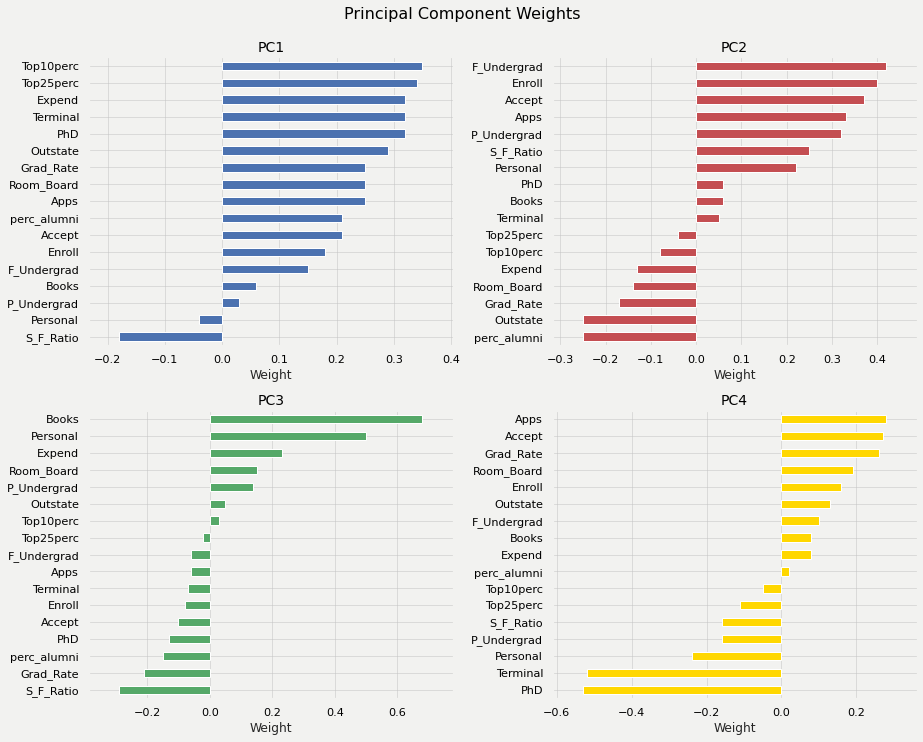

In [39]:
fig, axs = plt.subplots(figsize=(13, 20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
n_cols = 2
colors = np.array(['b', 'r', 'g', 'gold'])
for i, feature in enumerate(data_pca.index.to_list()):
    plt.subplot(len(data_pca.index), n_cols, i+1)
    data_pca.loc[feature].sort_values().plot(kind='barh', color=colors[i], legend=False)
    plt.title(f'{feature}', fontsize=14) 
    plt.xlabel('Weight')
    plt.margins(0.1, 0.0)
fig.suptitle('Principal Component Weights', fontsize=16)
plt.tight_layout()       
fig.subplots_adjust(top=0.945)
plt.show()

**Observations:**

- The first principal component, PC1, is related to high values of students scores (Top10perc, Top25perc), number of out-of-state students (Outstate), faculties education (PhD and Terminal) and the instructional expenditure (Expend) per student. This principal component seams to capture attributes that generally define premier colleges with high quality of students entering them and higher accomplishing faculty that is teaching there. They also seems to take rich students from all over the country. 
- The second principal component, PC2, is related to high values of number of applications - received (Apps), accepted (Accept) and enrolled (Enroll), and number of full time (F_Undergrad) and part time (P_Undergrad) students. This principal component seems to capture attributes that generally define non-premier colleges that are comparatively easier to get admissions into.
- The third principal component, PC3, is related to financial aspects i.e. personal spending (Personal) and cost of books (Books) for a student. It is also associated with low values of student faculty ratios (S_F_Ratio).
- The fourth principal component, PC4, is related to low values of faculty's education and high values of students' graduation rate. This principal component seems to capture attributes that define colleges which lack the highly educated faculty (PhD and Terminal) but it is comparatively easier to graduate from there (Grad_Rate).

In [40]:
print(data_pca.shape)
print(data_scaled.shape)

(4, 17)
(777, 17)


In [41]:
data_pca.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
PC1,0.25,0.21,0.18,0.35,0.34,0.15,0.03,0.29,0.25,0.06,-0.04,0.32,0.32,-0.18,0.21,0.32,0.25
PC2,0.33,0.37,0.40,-0.08,-0.04,0.42,0.32,-0.25,-0.14,0.06,0.22,0.06,0.05,0.25,-0.25,-0.13,-0.17
PC3,-0.06,-0.10,-0.08,0.03,-0.02,-0.06,0.14,0.05,0.15,0.68,0.50,-0.13,-0.07,-0.29,-0.15,0.23,-0.21
PC4,0.28,0.27,0.16,-0.05,-0.11,0.10,-0.16,0.13,0.19,0.08,-0.24,-0.53,-0.52,-0.16,0.02,0.08,0.26


In [42]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


In [43]:
pd.concat([
    data_scaled.mul(data_pca.head(1).values).sum(1).to_frame().T.round(2), 
    data_pca1[[0]].T.round(2)
], axis=0)

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
0,-1.59,-2.20,-1.43,2.86,-2.22,-0.59,0.25,1.75,0.77,-2.78,...,-0.79,-2.47,1.6,1.60,2.69,-3.32,0.2,-0.74,7.91,-0.47
0,-1.59,-2.19,-1.43,2.86,-2.22,-0.57,0.24,1.75,0.77,-2.77,...,-0.80,-2.47,1.6,1.62,2.70,-3.33,0.2,-0.73,7.92,-0.46


#### We can also visualize the data in 2 dimensions using first two principal components 

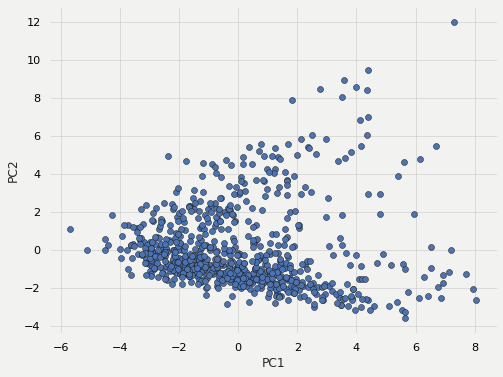

In [44]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1], edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2");

## t-SNE

Let's try to visualize the data using tSNE by reducing the number of dimensions to 2 and 3. 

**2d visualization**

In [45]:
#Fitting TSNE with number of components equal to 2 
tsne=TSNE(n_components = 2, random_state=1, n_jobs=-1)
data_tsne=tsne.fit_transform(data_scaled)

In [46]:
#Converting the embeddings to a dataframe
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2'])

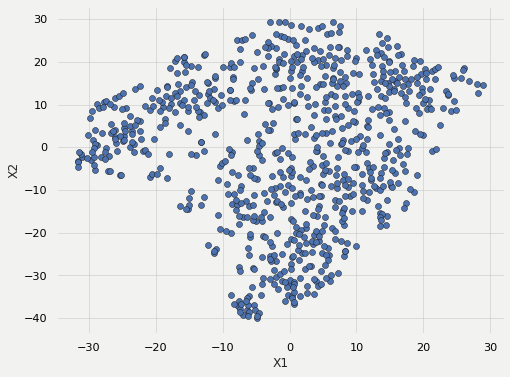

In [47]:
#Scatter plot for two components
plt.figure(figsize=(8,6))
sns.scatterplot(x='X1', y='X2', data=data_tsne, edgecolor='k');

**3d visualization**

In [48]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components=3, random_state=1, n_jobs=-1)
data_tsne = tsne.fit_transform(data_scaled)

In [49]:
data_tsne=pd.DataFrame(data_tsne, columns=['X1', 'X2', 'X3'])

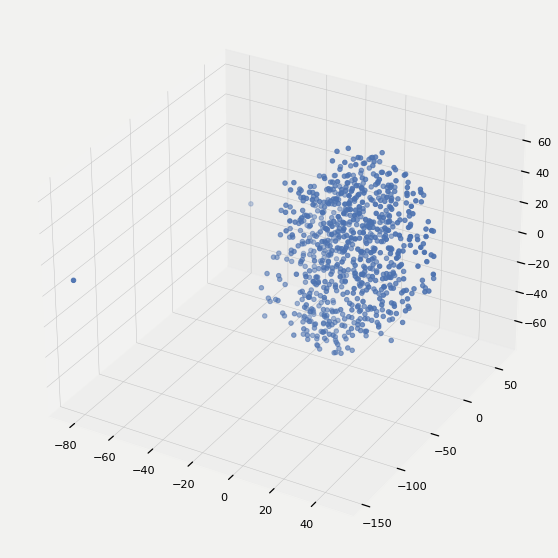

In [50]:
#Scatter plot for all three components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']
y = data_tsne['X2']
z = data_tsne['X3']

ax.scatter(x, y, z);

**Observations:**

- We know that tsne preserves the local structure of the data while embedding the data from high dimension to low dimension.
- Here, we have generated the 2D and 3D embeddings for the data. We can see that there is pattern in the data and it is scattered and clustered together with exception of some outliers.
- Let's try different perplexity values to visualize the data in 2d.

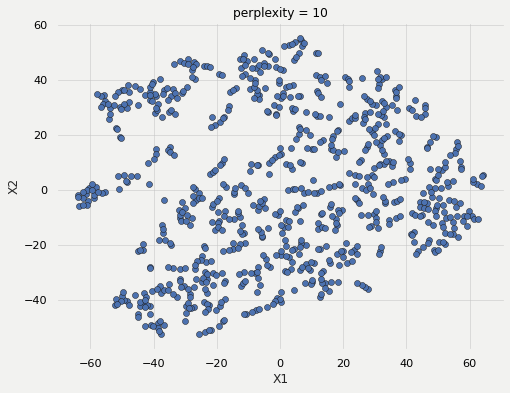

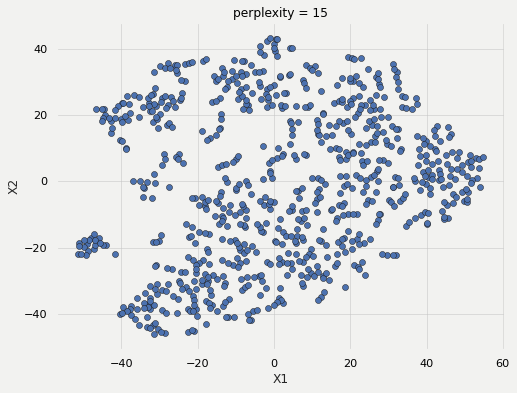

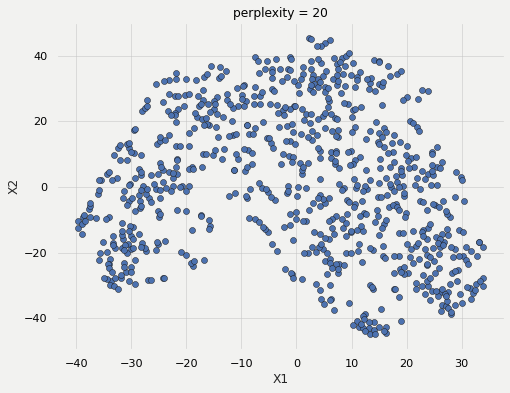

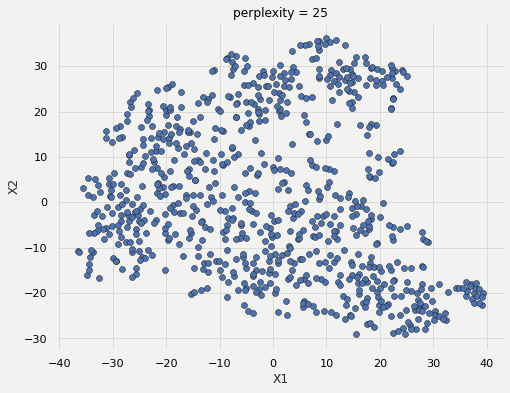

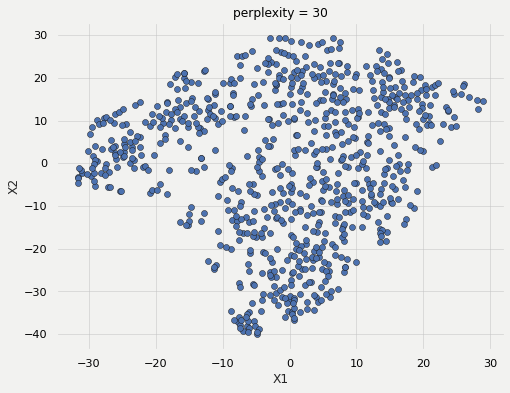

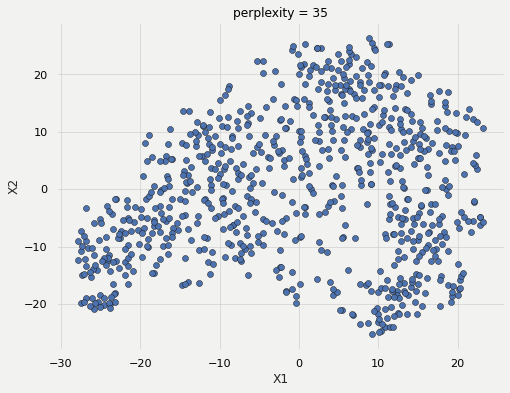

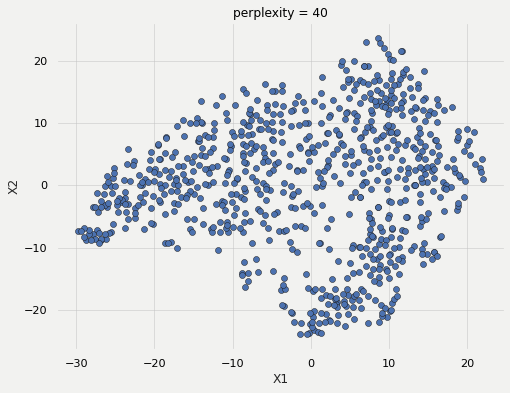

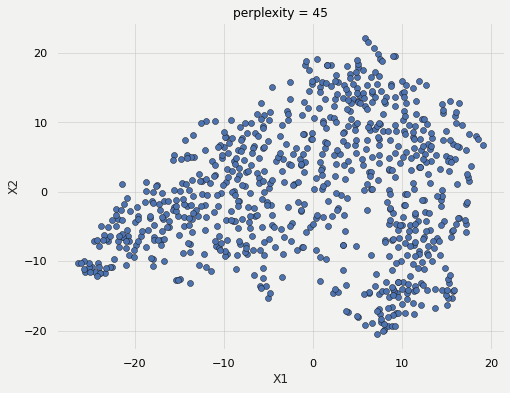

In [51]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i, n_jobs=-1)
    data_tsne = tsne.fit_transform(data_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (8,6))
    sns.scatterplot(x = 'X1', y='X2', data = data_tsne, edgecolor='k')
    plt.title("perplexity = {}".format(i))
    plt.show()

**Observations:**

- All the plots with different perplexity values implies that there is no underlying pattern in the data.
- This shows that observing pattern using visualization is dependent on the data. Let's see the implementation of t-sne on another data.

## Air Pollution Data

- Air pollution dataset contains about 13 months of data on major pollutants and meteorological levels of a city.
- Let's get an overview of the data and prepare it for visualization.

In [52]:
#Loading data
data_air_pol = pd.read_csv("Air Pollution Case Study-Dataset.csv")

In [53]:
data_air_pol.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


#### Check the info of the data

In [54]:
data_air_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

**Observations:**

- There are 403 observations and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
- Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
- The majority of the columns have some missing values.
- Let's check the number of missing values in each column.

In [55]:
data_air_pol.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

**Observation:**

- All the columns except SrNo and Date have missing values.

#### Data Preprocessing

In [56]:
data_air_pol.drop(columns=["SrNo", "Date"], inplace=True)

In [57]:
#Imputing missing values with mode for the Weather column and with median for all other columns
for col in data_air_pol.columns:
    if col == "Weather":
        data_air_pol[col].fillna(value=data_air_pol[col].mode()[0], inplace=True)
    else:
        data_air_pol[col].fillna(value=data_air_pol[col].median(), inplace=True)

In [58]:
#Creating dummy variables for Weather column
data_air_pol = pd.get_dummies(data_air_pol, drop_first=True)

#### Scaling the data

In [59]:
scaler1 = StandardScaler()
data_air_pol_scaled = scaler.fit_transform(data_air_pol)

In [60]:
data_air_pol_scaled = pd.DataFrame(data_air_pol_scaled, columns=data_air_pol.columns)
data_air_pol_scaled.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755


## Principal Component Analysis

In [61]:
#Defining the number of principal components to generate 
n = data_air_pol_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)
data_air_pol_pca = pd.DataFrame(pca1.fit_transform(data_air_pol_scaled))

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

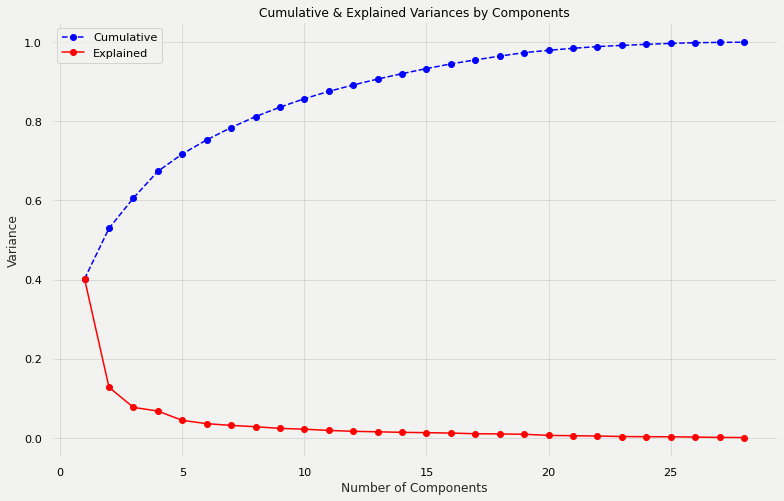

In [62]:
# visualize the Explained Individual Components
plt.figure(figsize = (13,8))
plt.plot(range(1,n+1), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color='blue')
plt.plot(range(1,n+1), pca1.explained_variance_ratio_, marker = 'o', color='red')
plt.title("Cumulative & Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.legend(['Cumulative', 'Explained']);

In [63]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
    sum += i
    if(sum > 0.70):
        print("Number of PCs that explain at least 70% variance: ", ix+1)
        break

Number of PCs that explain at least 70% variance:  5


In [64]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_air_pol_scaled.columns, columns=cols)

In [65]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: hotpink'
    elif val >= 0.25:
        return 'background: lime'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000


**Observations:**

- The first principal component, PC1, is related to hydrocarbons like Benzene, Toulene and Xylene which are generated due to fuel combustion.   
- The second principal component, PC2, is related to humidity (RH), Ozone level and rain i.e. monsoon season. Whenever humidity goes down, Ozone level goes up - more sunshine. Higher humidity is an indication of the rain which has potential to wash away atmospheric pollution
- The third principal component, PC3, is capturing pressure in the air - low pressure accompanies windy and rainy conditions, dispersing the pollution away. High pressure stills the wind allowing pollution to build up in urban areas. 
- The fourth principal component, PC4, is associated to high values of toxic gases like SO2 and also related to weather.
- The fifth principal component, PC5,  is explaining direction of wind which impacts air pollution irrespective of concentration of all of pollutants. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction of for example, open farmland.

## t-SNE

Let's try to visualize the data for different perplexity values 

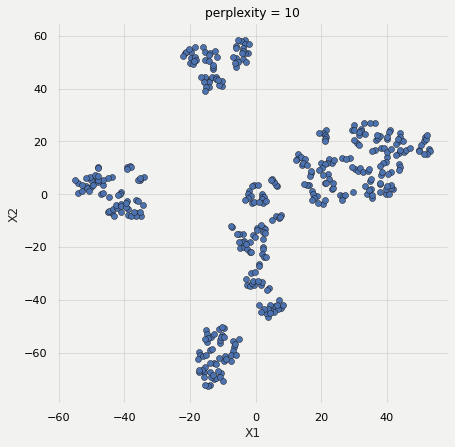

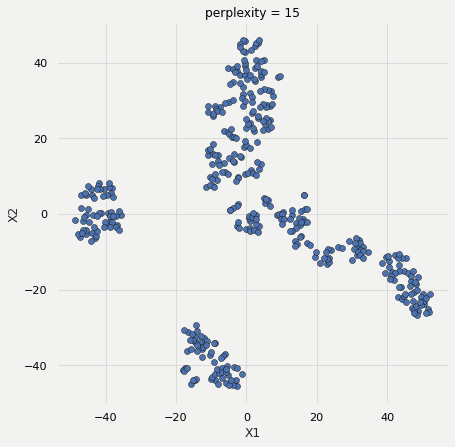

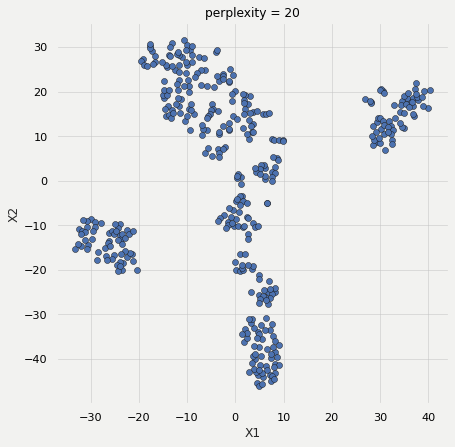

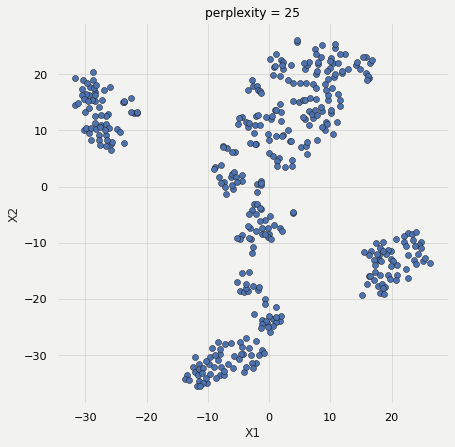

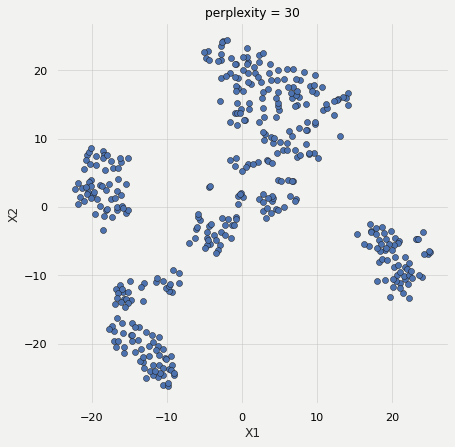

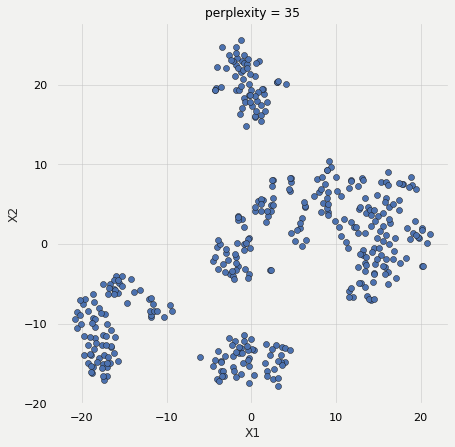

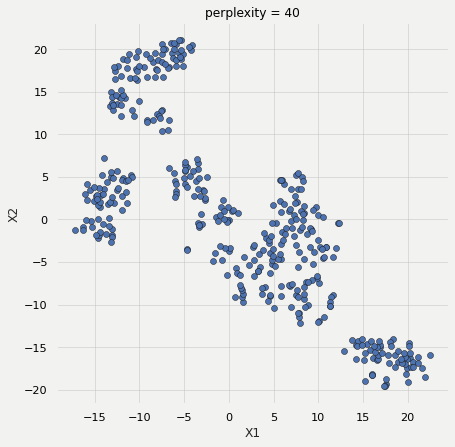

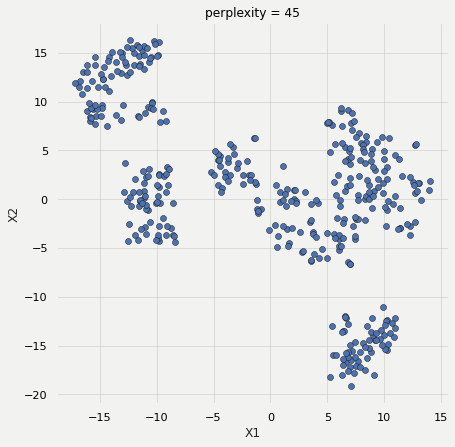

In [66]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state=1, perplexity=i)
    data_air_pol_tsne = tsne.fit_transform(data_air_pol_scaled)
    data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne)
    data_air_pol_tsne.columns = ['X1', 'X2']
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y='X2', data = data_air_pol_tsne, edgecolor='k')
    plt.title("perplexity = {}".format(i))
    plt.show()

**Observations:**

- We can see that some perplexity values like 35 and 45 are able to capture the underlying pattern in the data better than other perplexity values. 
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with perplexity equal to 35 as there are clear 4 cluster which are distant form each other i.e. well separated.  

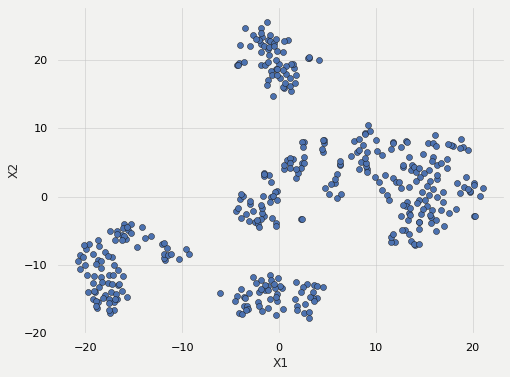

In [67]:
#Fitting TSNE with number of components equal to 2 
tsne = TSNE(n_components=2, random_state=1, perplexity=35, n_jobs=-1)
data_air_pol_tsne=tsne.fit_transform(data_air_pol_scaled)

#Converting the embeddings to a dataframe
data_air_pol_tsne=pd.DataFrame(data_air_pol_tsne, columns=["X1", "X2"])

#Scatter plot for two components
plt.figure(figsize=(8,6))
sns.scatterplot(x='X1', y='X2', data=data_air_pol_tsne, edgecolor='k');

**Observations:**

- We can clearly see 4 clusters in the data.
- We can label these 4 groups.

In [68]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']
    second_component = x['X2']
    if second_component > 12:
        return 'group_1'
    elif (second_component < -10) and (first_component > -10): 
        return 'group_2'
    elif (second_component < 12) and (first_component > -9):
        return 'group_3'
    else: 
        return 'group_4'

In [69]:
data_air_pol_tsne['groups'] = data_air_pol_tsne.apply(grouping, axis=1)

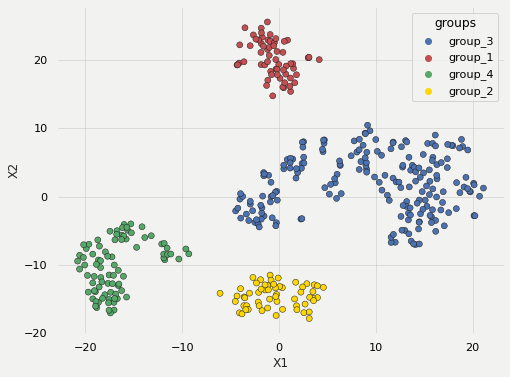

In [70]:
#Scatter plot for two components with hue
plt.figure(figsize=(8,6))
sns.scatterplot(x ='X1', y='X2', data=data_air_pol_tsne, hue='groups', edgecolor='k');

**Let's try to visualize properties of these four groups w.r.t all the numeric variables in the data.** 

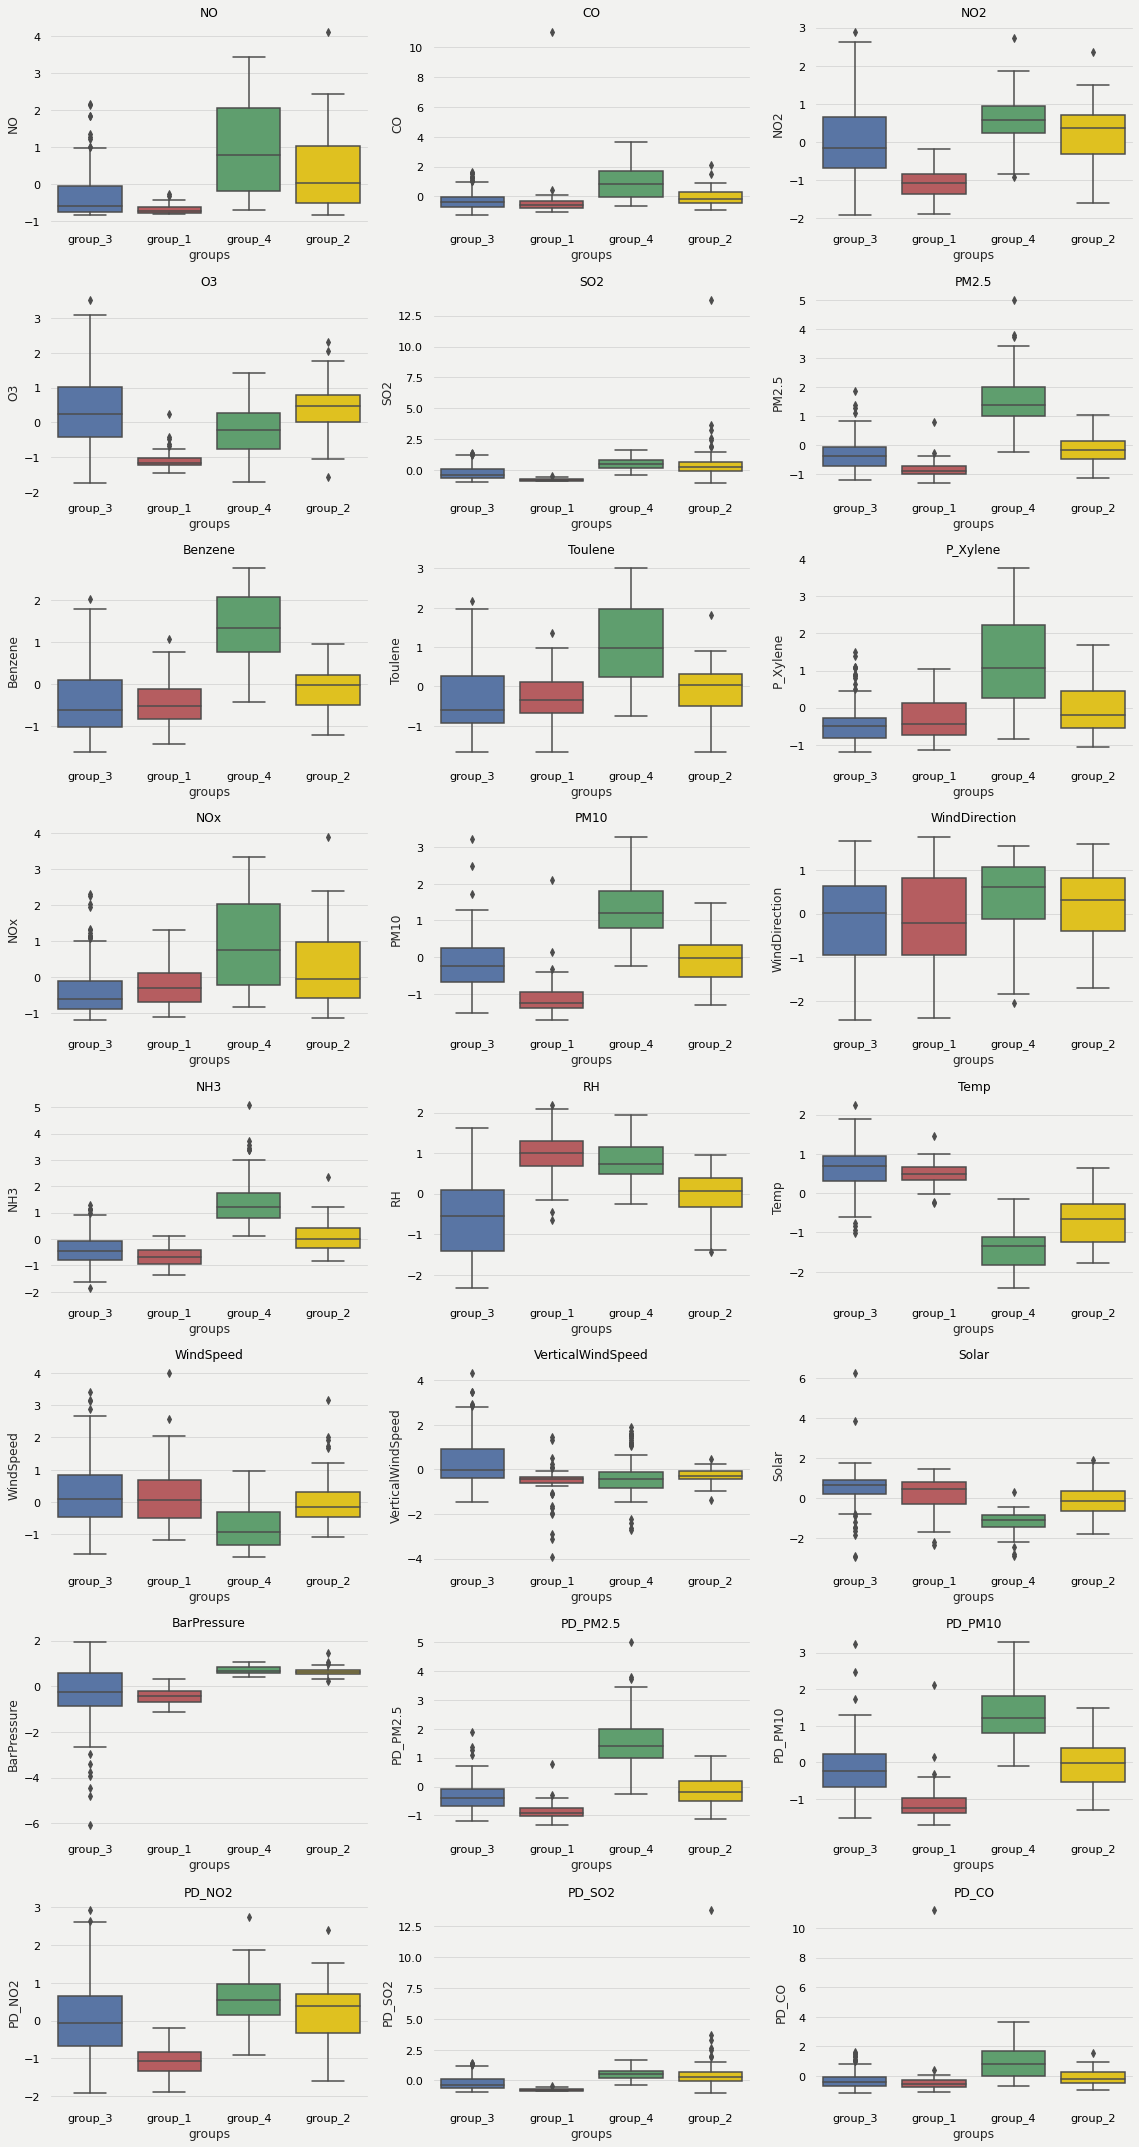

In [71]:
all_col = data_air_pol_scaled.columns[:-4].tolist()
plt.figure(figsize=(16, 30))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=data_air_pol_scaled[variable], x=data_air_pol_tsne['groups'])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
- There are four groups in the data. Each group has different set of characteristics.

- Group 1 represents **hot and humid areas**. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of the rain which has potential to wash away atmospheric pollution which results in low levels of pollutants - fine particulate matter and hydrocarbons.

- Group 2 represents areas with medium humidity and temperature with low pressure and wind speed. The level of pollutants is medium. These might be **developing urban areas** where O3 pollutant is medium to high which results in comparatively higher solar radiations.

- Group 3 is the largest group and represents low humid and high temperature areas. As the variability in pressure is high, the wind speed is high. If the wind is blowing towards an urban area from an industrial area then pollution levels are likely to be higher in the town or city than if the air is blowing from another direction of for example, open farmland. These might be **developed urban areas** as it has the highest level of O3 pollutant and solar radiation which can be a result of pollutants emitted by cars, power plants, etc. 

- Group 4 represents **industrial areas** as it has very high level of hydrocarbons which are generally a result of fuel combustion. These areas have high level of fine particulate matter and other pollutants. As there is less variability in the pressure, the wind speed is low.